In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import jaccard_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trtbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalachh'}>],
       [<Axes: title={'center': 'exng'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slp'}>, <Axes: title={'center': 'caa'}>],
       [<Axes: title={'center': 'thall'}>,
        <Axes: title={'center': 'output'}>, <Axes: >, <Axes: >]],
      dtype=object)

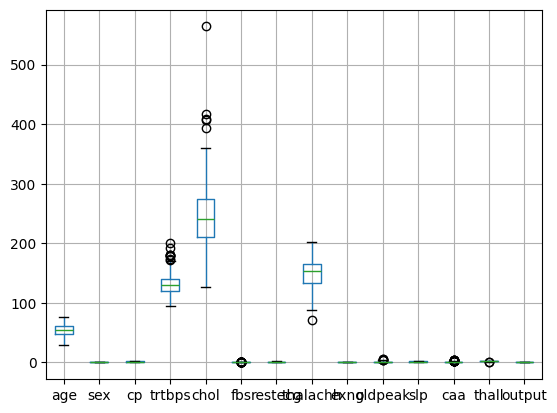

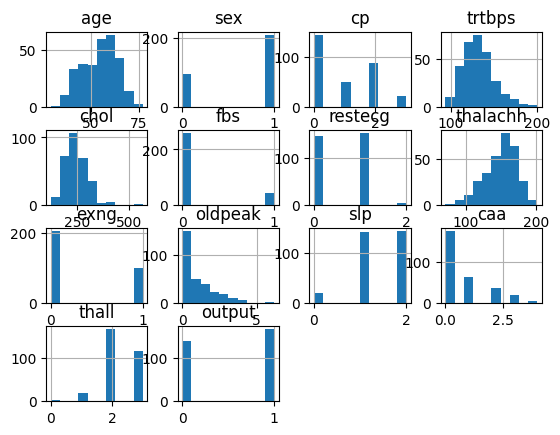

In [2]:
df = pd.read_csv("../heart.csv")

scaler = StandardScaler()

columns = ["age", "sex", "cp", "trtbps", "chol", "fbs", "restecg", "thalachh", "exng", "oldpeak", "slp", "caa", "thall"]

df.boxplot()
df.hist()

In [3]:
X = df[columns]
Y = df["output"]

X = scaler.fit_transform(X)

X = np.asarray(X)
Y = np.asarray(Y)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

df.boxplot()

<Axes: >

In [4]:
k = 3
model = KNeighborsClassifier(n_neighbors=k)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [5]:
predicted = model.predict(x_test)
print(f"F1_Score: {f1_score(y_test, predicted)}")
print(f"Jaccard: {jaccard_score(y_test, predicted)}")

F1_Score: 0.8285714285714286
Jaccard: 0.7073170731707317


In [6]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [7]:
cnf_matrix = confusion_matrix(y_test, predicted, labels=[0, 1])
np.set_printoptions(precision=2)
print(classification_report(y_test, predicted, labels=[0, 1]))
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=model.classes_, normalize=False, title="Confusion-Matrix")

              precision    recall  f1-score   support

           0       0.74      0.80      0.77        25
           1       0.85      0.81      0.83        36

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61

Confusion matrix, without normalization
[[20  5]
 [ 7 29]]
